## Homework 05

SOLVED by ANGELA CARRARO

## Exercise

Load the national COVID dataset and solve the exercise using `scikit-learn` library.
Consider first the column corresponding to the (cumulative) number of deaths. 
1. Perform a train-test split, with observations from the last week corresponding to the test set;
2. Build a suitable combination of kernels choosing from the ones shown in `notebook_05`;
3. Fit a `GaussianProcessRegressor` to predict the daily number of swabs, plot future predictions and compare them to real test data;
4. Repeat points 1-3 on the daily number of swabs, which can be computed from the cumulative number provided in the dataset.

You are welcome to try out and fit other data streams in the dataset. 


**Solution.**

The data are taken from [this repository](https://github.com/pcm-dpc/COVID-19) on GitHub.

The structure of the dataset is the following:


| Nome campo                  | Descrizione                       | Description                            | Formato                       | Esempio             |
|-----------------------------|-----------------------------------|----------------------------------------|-------------------------------|---------------------|
| **data**                        | Data dell'informazione            | Date of notification                   | YYYY-MM-DD HH:MM:SS (ISO 8601) Ora italiana | 2020-03-05 12:15:45 |
| **stato**                       | Stato di riferimento              | Country of reference                   | XYZ (ISO 3166-1 alpha-3)      | ITA                 |
| **ricoverati_con_sintomi**      | Ricoverati con sintomi            | Hospitalised patients with symptoms    | Numero                        | 3                   |
| **terapia_intensiva**           | Ricoverati in terapia intensiva   | Intensive Care                         | Numero                        | 3                   |
| **totale_ospedalizzati**        | Totale ospedalizzati              | Total hospitalised patients            | Numero                        | 3                   |
| **isolamento_domiciliare**      | Persone in isolamento domiciliare | Home confinement                       | Numero                        | 3                   |
| **totale_positivi** | Totale attualmente positivi (ospedalizzati + isolamento domiciliare)      | Total amount of current positive cases (Hospitalised patients + Home confinement)  | Numero                        | 3                   |
| **variazione_totale_positivi**  | Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente)       | News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  | Numero                        | 3                   |
| **nuovi_positivi**  | Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente)       | News amount of current positive cases (totale_casi current day - totale_casi previous day)  | Numero                        | 3                   |
| **dimessi_guariti**             | Persone dimesse guarite           | Recovered                              | Numero                        | 3                   |
| **deceduti**                    | Persone decedute                  | Death                                  | Numero                        | 3                   |
| **totale_casi**                 | Totale casi positivi              | Total amount of positive cases         | Numero                        | 3                   |
| **tamponi**                     | Totale tamponi                    | Tests performed                        | Numero                        | 3                   |
| **casi_testati**                     | Totale dei soggetti sottoposti al test                    | Total number of people tested                        | Numero                        | 3                   |
| **note_it**                     | Note in lingua italiana (separate da ;)                   | Notes in italian language (separated by ;)                       | Testo                        | pd-IT-000                   |
| **note_en**                     | Note in lingua inglese (separate da ;)                    | Notes in english language (separated by ;)                       | Testo                        | pd-EN-000                   |



In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import gaussian_process
from matplotlib import pyplot as plt
import matplotlib as mt
mt.rcParams['axes.titlesize'] = 20
mt.rcParams['axes.labelsize'] = 16
mt.rcParams['xtick.labelsize'] = 12
mt.rcParams['ytick.labelsize'] = 12
mt.rcParams['legend.fontsize'] = 14

In [2]:
# Load the dataset
data_covid = pd.read_csv(os.path.join("data", "dpc-covid19-ita-andamento-nazionale.csv"), header=0)
data_covid

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN
5,2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,NaN,NaN,NaN
6,2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,NaN,NaN,NaN
7,2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,NaN,NaN,NaN
8,2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN,NaN,NaN
9,2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,107,3089,29837,NaN,NaN,NaN


We can drop the first column since the State is always Italy (it's the national dataset), and the last two columns since they contain only some notes, not relevant for our analysis.

In [3]:
# data_covid = data_covid.iloc[:, :14]
cols = data_covid.columns.drop("stato")
cols = cols.drop("note_it")
cols = cols.drop("note_en")
data_covid = data_covid.loc[:, list(cols.values)]
data_covid.head(10)

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
0,2020-02-24T18:00:00,101,26,127,94,221,0,221,1,7,229,4324,NaN
1,2020-02-25T18:00:00,114,35,150,162,311,90,93,1,10,322,8623,NaN
2,2020-02-26T18:00:00,128,36,164,221,385,74,78,3,12,400,9587,NaN
3,2020-02-27T18:00:00,248,56,304,284,588,203,250,45,17,650,12014,NaN
4,2020-02-28T18:00:00,345,64,409,412,821,233,238,46,21,888,15695,NaN
5,2020-02-29T18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,NaN
6,2020-03-01T18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,NaN
7,2020-03-02T18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,NaN
8,2020-03-03T18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN
9,2020-03-04T18:00:00,1346,295,1641,1065,2706,443,587,276,107,3089,29837,NaN


In [4]:
# Replace NaN with 0
data_covid.replace(to_replace=np.nan, value=0, inplace=True)
data_covid

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
0,2020-02-24T18:00:00,101,26,127,94,221,0,221,1,7,229,4324,0.0
1,2020-02-25T18:00:00,114,35,150,162,311,90,93,1,10,322,8623,0.0
2,2020-02-26T18:00:00,128,36,164,221,385,74,78,3,12,400,9587,0.0
3,2020-02-27T18:00:00,248,56,304,284,588,203,250,45,17,650,12014,0.0
4,2020-02-28T18:00:00,345,64,409,412,821,233,238,46,21,888,15695,0.0
5,2020-02-29T18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,0.0
6,2020-03-01T18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,0.0
7,2020-03-02T18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,0.0
8,2020-03-03T18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,0.0
9,2020-03-04T18:00:00,1346,295,1641,1065,2706,443,587,276,107,3089,29837,0.0


In [5]:
# Fix time index
data_covid.index = pd.to_datetime(data_covid["data"])
l = list(data_covid.columns.values)
l.remove("data")
data_covid = data_covid.loc[:, l]
data_covid.head(10)

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
data,,,,,,,,,,,,
2020-02-24 18:00:00,101,26,127,94,221,0,221,1,7,229,4324,0.0
2020-02-25 18:00:00,114,35,150,162,311,90,93,1,10,322,8623,0.0
2020-02-26 18:00:00,128,36,164,221,385,74,78,3,12,400,9587,0.0
2020-02-27 18:00:00,248,56,304,284,588,203,250,45,17,650,12014,0.0
2020-02-28 18:00:00,345,64,409,412,821,233,238,46,21,888,15695,0.0
2020-02-29 18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,0.0
2020-03-01 18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,0.0
2020-03-02 18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,0.0
2020-03-03 18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,0.0


In [6]:
# function to convert datetimes to numbers that are useful to algorithms
#   this will be useful later when doing prediction

def dates_to_idx(timelist):
    reference_time = pd.to_datetime(data_covid.index[0])
    t = (timelist - reference_time) / pd.Timedelta(1, "D")
    return np.asarray(t)

t = dates_to_idx(data_covid.index)

# normalize total positive data
y = data_covid["totale_positivi"].values
first_pos = y[0]
std_pos = np.std(y)
y_n = (y - first_pos) / std_pos

data_covid = data_covid.assign(t = t)
data_covid = data_covid.assign(y_n = y_n)
data_covid

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,t,y_n
data,,,,,,,,,,,,,,
2020-02-24 18:00:00,101,26,127,94,221,0,221,1,7,229,4324,0.0,0.000000,0.000000
2020-02-25 18:00:00,114,35,150,162,311,90,93,1,10,322,8623,0.0,1.000000,0.002132
2020-02-26 18:00:00,128,36,164,221,385,74,78,3,12,400,9587,0.0,2.000000,0.003886
2020-02-27 18:00:00,248,56,304,284,588,203,250,45,17,650,12014,0.0,3.000000,0.008695
2020-02-28 18:00:00,345,64,409,412,821,233,238,46,21,888,15695,0.0,4.000000,0.014216
2020-02-29 18:00:00,401,105,506,543,1049,228,240,50,29,1128,18661,0.0,5.000000,0.019618
2020-03-01 18:00:00,639,140,779,798,1577,528,566,83,34,1694,21127,0.0,6.000000,0.032128
2020-03-02 18:00:00,742,166,908,927,1835,258,342,149,52,2036,23345,0.0,7.000000,0.038241
2020-03-03 18:00:00,1034,229,1263,1000,2263,428,466,160,79,2502,25856,0.0,8.000000,0.048382


Now we split into training and test set. As test set I have choosen to keep $30\%$ of the data, so $70 \cdot 30\% = 21$ observations.

In [7]:
sep_idx = data_covid.index.searchsorted(pd.to_datetime("2020-04-13 17:00:00"))
data_early = data_covid.iloc[:sep_idx+1, :]
data_later = data_covid.iloc[sep_idx:, :]

Text(0.5, 1.0, 'Total positive persons as a function of true time')

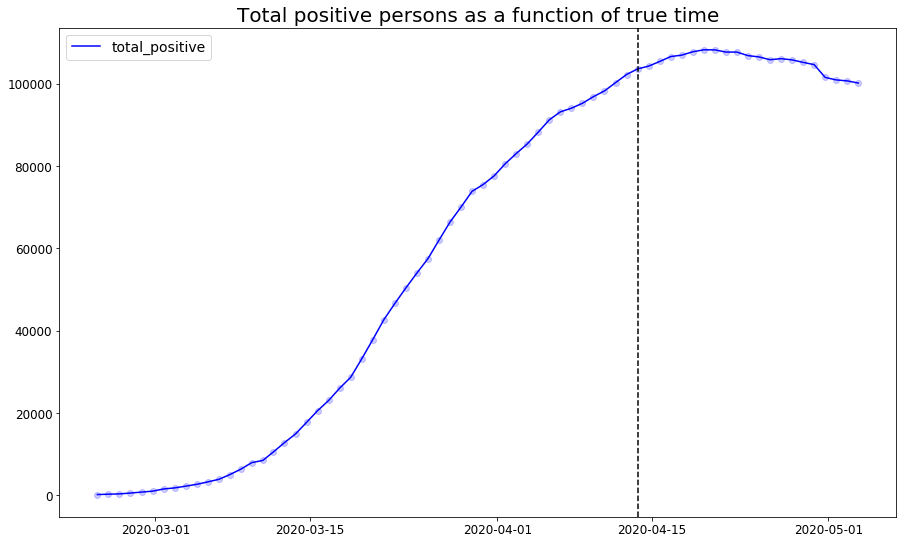

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.plot(data_covid.index, data_covid.totale_positivi.values, color='b', label='total_positive')
ax.plot(data_covid.index, data_covid.totale_positivi.values, color='b', marker='o', linestyle='', alpha=0.2)
ax.axvline(pd.to_datetime("2020-04-13 17:00:00"), linestyle='--', color='k') # vertical line
ax.legend()
ax.set_title('Total positive persons as a function of true time')

Text(0.5, 1.0, 'Total positive persons as a function of time index')

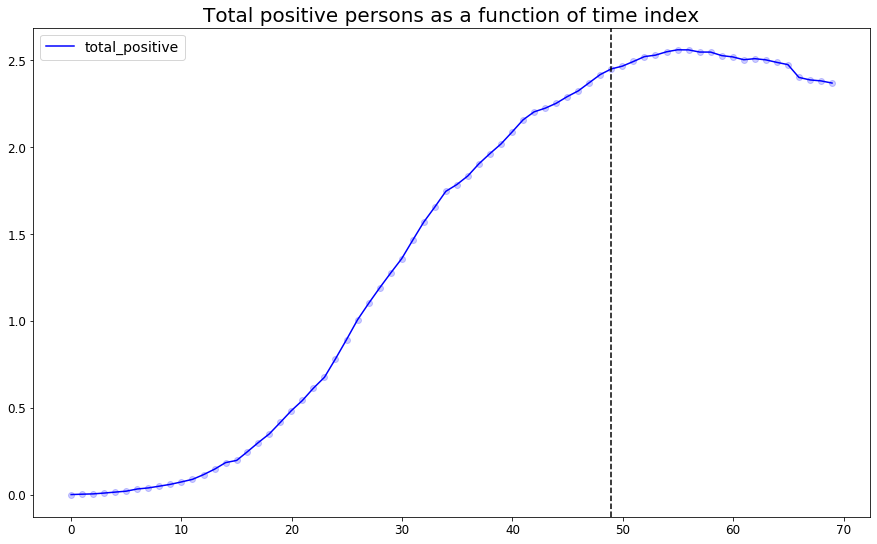

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.plot(data_covid.t.values, data_covid.y_n.values, color='b', label='total_positive')
ax.plot(data_covid.t.values, data_covid.y_n.values, color='b', marker='o', linestyle='', alpha=0.2)
ax.axvline(dates_to_idx(pd.to_datetime("2020-04-13 17:00:00")), linestyle='--', color='k')
ax.legend()
ax.set_title('Total positive persons as a function of time index')

## Fitting Gaussian Processes for forecasting

We will use different kernels to try to explain the training data and view how the predictions work for the test set.

In [10]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [11]:
X = data_covid.t.values[:, None]
train_X = X[:len(data_early)]
test_X = X[len(data_early):]
# To use the raw data you shold use
#y = data_covid.totale_positivi.values
#train_y = y[:len(data_early)]
#test_y = y[len(data_early):]

In [12]:
# To use the normalized data you shold use
y = data_covid.y_n.values
train_y = y[:len(data_early)]
test_y = y[len(data_early):]

In [13]:
def plot_predictions(gp, include_observed=True):
    pred_y, pred_std = gp.predict(X, return_std=True)
    plt.figure(figsize=(10, 7))
    x = X[:, 0]
    if include_observed:
        plt.plot(x, y, 'ok', alpha=0.1)
    l, = plt.plot(x, pred_y)
    plt.fill_between(x, pred_y + pred_std, pred_y - pred_std,
                     color=l.get_color(), alpha=0.3)
    if np.allclose(X[:, 0], data_covid.t.values):
        plt.axvline(dates_to_idx(pd.to_datetime("2020-04-13 17:00:00")), linestyle='--', color='k')
    else:
        plt.axvline(pd.to_datetime("2020-04-13 17:00:00"), linestyle='--', color='k')

In [14]:
k1 = 50**2 * RBF(length_scale=50.0) # Long term trend

# Create the regressor
gp0 = GaussianProcessRegressor(kernel=k1, alpha=0.01, normalize_y=True, n_restarts_optimizer=3)
gp0

GaussianProcessRegressor(alpha=0.01, copy_X_train=True,
             kernel=50**2 * RBF(length_scale=50), n_restarts_optimizer=3,
             normalize_y=True, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [15]:
# Train the regressor
gp0.fit(train_X, train_y)

GaussianProcessRegressor(alpha=0.01, copy_X_train=True,
             kernel=50**2 * RBF(length_scale=50), n_restarts_optimizer=3,
             normalize_y=True, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [16]:
# The fitted kernel's parameters are packed into an array
gp0.kernel_.theta

array([-0.06176177,  3.11273653])

In [17]:
# The GP also exposes the log marginal likelihood function callable
k1 = np.linspace(1e-3, 25, 50)
k2 = np.linspace(1e-3, 20, 50)
lml = np.empty((len(k1), len(k2)))
for i, k1_ in enumerate(k1):
    for j, k2_ in enumerate(k2):
        try:
            lml[i, j] = gp0.log_marginal_likelihood([k1_, k2_])
        except ValueError:
            # Numerical instabilities can cause overflows or underflows
            # we replace these errored values with NaN
            lml[i, j] = np.nan

Text(0.5, 1.0, 'Log marginal likelihood')

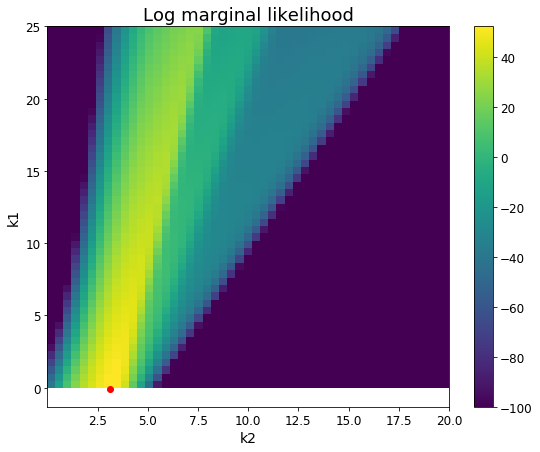

In [18]:
plt.figure(figsize=(9, 7))
plt.pcolor(k2, k1, lml, vmin=-100)
plt.colorbar()
plt.plot([gp0.kernel_.theta[1]], [gp0.kernel_.theta[0]], 'or')
plt.xlabel('k2', fontsize=14)
plt.ylabel('k1', fontsize=14)
plt.title('Log marginal likelihood', fontsize=18)

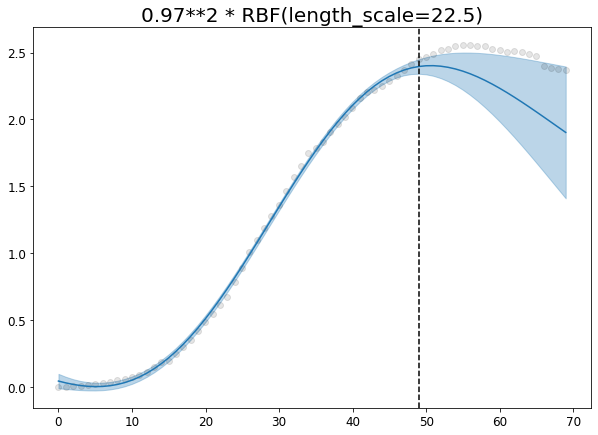

In [19]:
plot_predictions(gp0)
plt.title(str(gp0.kernel_));

Let's try with another kernel.

0.975**2 * RBF(length_scale=16.2) + 0.021**2 * RBF(length_scale=112) + WhiteKernel(noise_level=0.001)

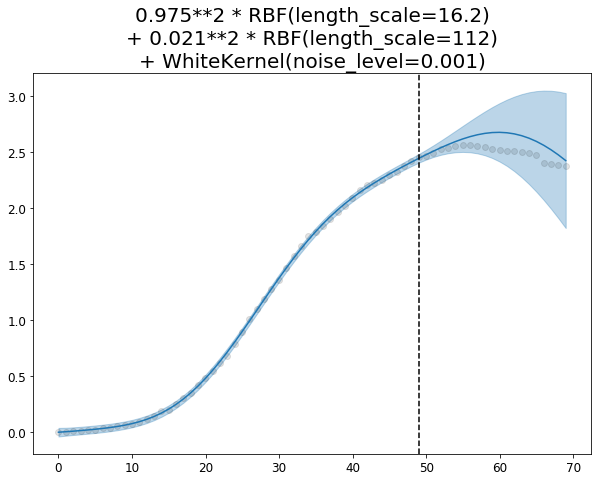

In [20]:
k1 = 50**2 * RBF(length_scale=50.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, 1e9))  # noise terms
kernel = k1 + k4
gp1 = GaussianProcessRegressor(kernel=kernel, alpha=0.0,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp1.fit(train_X, train_y)
plot_predictions(gp1)
plt.title(str(gp1.kernel_).replace(' +', '\n+'))
gp1.kernel_

This goes much better than the previous one.

1.03**2 * RBF(length_scale=28.5) + 0.384**2 * RBF(length_scale=15.5) * ExpSineSquared(length_scale=122, periodicity=1)

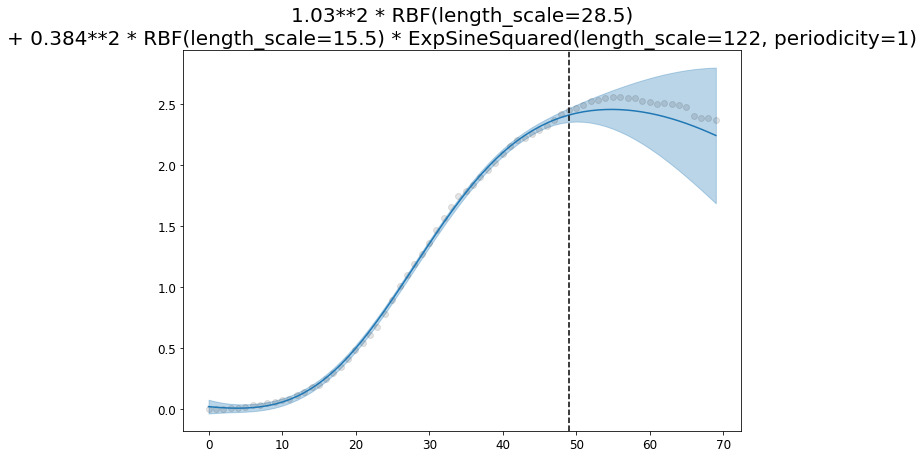

In [21]:
k1 = 50**2 * RBF(length_scale=50.0) # Long term trend
k2 = 20 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=12.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
kernel = k1 + k2
gp2 = GaussianProcessRegressor(kernel=kernel, alpha=0.01,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp2.fit(train_X, train_y)
plot_predictions(gp2)
plt.title(str(gp2.kernel_).replace(' +', '\n+'))
gp2.kernel_

This one is worst than the previous one, suggesting that the `ExpSineSquared` kernel doesn't model very much the data.

0.00316**2 * RBF(length_scale=8.54e+04) + 0.00316**2 * RBF(length_scale=3.68e+04) * ExpSineSquared(length_scale=86.3, periodicity=1) + 0.975**2 * RBF(length_scale=16.2) + WhiteKernel(noise_level=0.001)

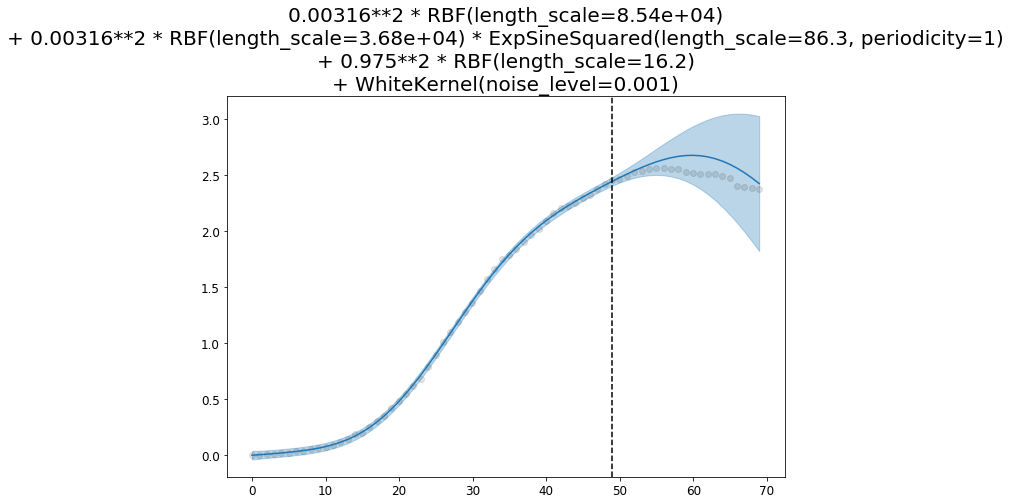

In [22]:
k1 = 50**2 * RBF(length_scale=50.0)
k2 = 20 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, 1e9))  # noise terms
kernel = k1 + k2 + k4
gp3 = GaussianProcessRegressor(kernel=kernel, alpha=0.0,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp3.fit(train_X, train_y)
plot_predictions(gp3)
plt.title(str(gp3.kernel_).replace(' +', '\n+'))
gp3.kernel_

0.0574**2 * RBF(length_scale=29.6) + 1.17**2 * RBF(length_scale=29.7) * ExpSineSquared(length_scale=3.08e+04, periodicity=1) + 0.191**2 * RationalQuadratic(alpha=1e+05, length_scale=11.3) + 0.00316**2 * RBF(length_scale=3.19e+04) + WhiteKernel(noise_level=0.001)

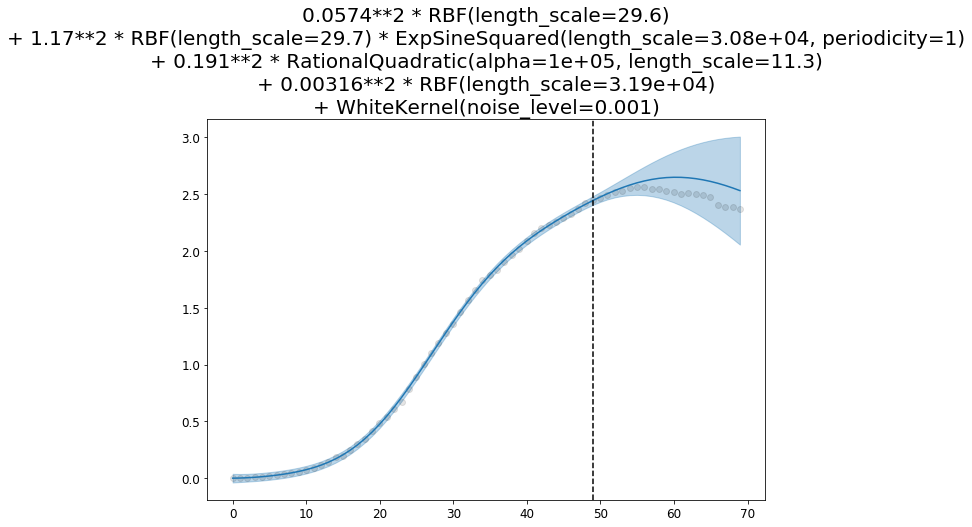

In [23]:
k1 = 50.0**2 * RBF(length_scale=50.0)
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-3, 1e9))  # noise terms
kernel = k1 + k2 + k3 + k4

gp_full = GaussianProcessRegressor(kernel=kernel, alpha=0,
                                   normalize_y=True,
                                   n_restarts_optimizer=3)
gp_full.fit(train_X, train_y)
plot_predictions(gp_full)
plt.title(str(gp_full.kernel_).replace(' +', '\n+'))
gp_full.kernel_

Now we try other kernels.

0.191**2 * RBF(length_scale=11.3) + 0.00717**2 * RationalQuadratic(alpha=1.74e+03, length_scale=1.24e+04) + 1.18**2 * RBF(length_scale=29.7) + WhiteKernel(noise_level=0.001)

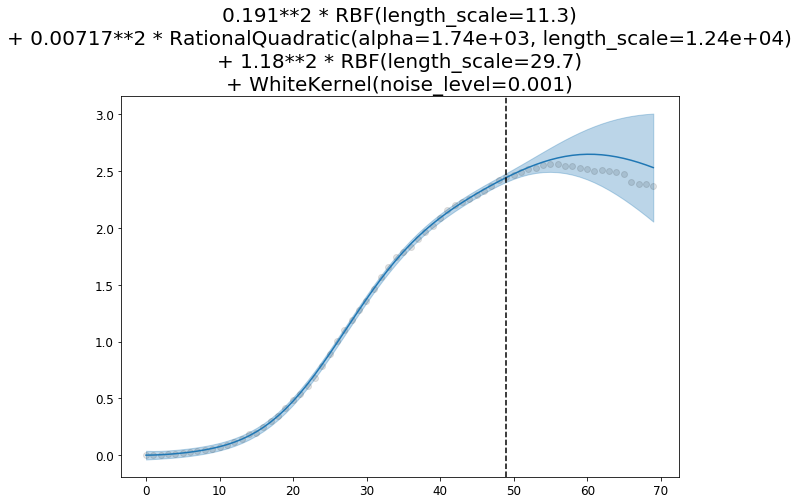

In [24]:
k1 = 50.0**2 * RBF(length_scale=50.0)
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,noise_level_bounds=(1e-3, 1e9))  # noise terms
kernel = k1 + k3 + k4

gp_full = GaussianProcessRegressor(kernel=kernel, alpha=0,
                                   normalize_y=True,
                                   n_restarts_optimizer=3)
gp_full.fit(train_X, train_y)
plot_predictions(gp_full)
plt.title(str(gp_full.kernel_).replace(' +', '\n+'))
gp_full.kernel_

If instead we use the full dataset as training and we try to infer the trend of the disease, we get:

In [25]:
X = data_covid.t.values[:, None]
y = data_covid.totale_positivi.values